<div style="text-align: center; background-color: cream;">
  <h1 style="color: #4B0082, font-family: 'Merriweather', serif;">Investigation of the factors affecting the biking duration in San Fransisco Bay Area Bike Sharing Scheme</h1>
    <br>
    <b>By Buhari Shehu (The Datavestigator)</b>
</div>

<img src="bike.jpg" alt="Bike Sharing" style="max-width: 80%;">

## Introduction
A bicycle-sharing system or public bike share (PBS) scheme, is a shared transport service where bicycles are available for shared use to individuals on a short-term basis at low or zero cost. It was initiated as way to promote bicycles as a non-polluting form of transportation. [see](https://en.wikipedia.org/wiki/Bicycle-sharing_system)

The systems themselves include both docking and dockless systems, where docking systems allow users to borrow a bike from a dock, i.e., a technology-enabled bicycle rack and return at another node or dock within the system — and dockless systems offer a node-free system relying on smart technology. In either format, systems may incorporate smartphone web mapping to locate available bikes and docks.[see](https://en.wikipedia.org/wiki/Bicycle-sharing_system)

In this project, we aim to gain valuable insights into bike sharing patterns and user behaviours. By examining various factors such as ride duration, user age, gender, and user type, we will uncover trends, correlations, and patterns within the dataset. Through visualizations and statistical analysis, we will explore the impact of these variables on bike usage and identify key factors that influence biking behaviours. The outcomes of this project will provide valuable information for bike sharing companies to optimize their resources, understand user preferences, tailor marketing strategies, and enhance the overall biking experience.

## Dataset Description
The bike sharing dataset of San Francisco Bay Area for the first quarter of 2019 was analysed in this project. It consists of  the following 16 features: 
- `duration_sec` 
- `start_time` 
- `end_time`
- `start_station_id` 
- `start_station_name`	
- `start_station_latitude`	
- `start_station_longitude`	
- `end_station_id`
- `end_station_name`	
- `end_station_latitude`
- `end_station_longitude`
- `bike_id`	
- `user_type`
- `member_birth_year`
- `member_gender` 
- `and bike_share_for_all_trip`.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# import datetime
import datetime as dt

# import warnings
import warnings 
warnings.filterwarnings('ignore') 

%matplotlib inline

**Loading the dataset**

In [5]:
data1 = pd.read_csv("201901-fordgobike-tripdata.csv")
data2 = pd.read_csv("201902-fordgobike-tripdata.csv")
data3 = pd.read_csv("201903-fordgobike-tripdata.csv")
data4 = pd.read_csv("201904-fordgobike-tripdata.csv")

**Checking the datasets**

In [3]:
data1.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No


In [4]:
data2.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [5]:
data3.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,53588,2019-03-31 20:59:21.8780,2019-04-01 11:52:30.2000,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,1980.0,Other,No
1,74305,2019-03-31 13:56:46.0050,2019-04-01 10:35:11.4540,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,1990.0,Male,No
2,79789,2019-03-31 11:48:34.2010,2019-04-01 09:58:23.8240,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,NaN,NaN,No


In [6]:
data4.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No


Verifying column names uniformity

In [7]:
all(data1.columns) == all(data2.columns) == all(data3.columns) == all(data4.columns)

True

This shows that all column names in the multiple tables are the same and they can be merged without issues.

## Data Wrangling
**Merging the datasets**

In [10]:
bike_data = pd.concat([data4, data3, data2, data1], ignore_index=True)

### What is the structure of the dataset?

In [11]:
bike_data.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No


In [12]:
bike_data.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
870901,565,2019-01-01 00:11:03.4410,2019-01-01 00:20:29.2680,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,243.0,Bancroft Way at College Ave,37.869360,-122.254337,4783,Subscriber,1998.0,Male,Yes
870902,182,2019-01-01 00:09:56.2110,2019-01-01 00:12:58.7480,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,4621,Subscriber,1999.0,Male,Yes
870903,226,2019-01-01 00:07:10.5760,2019-01-01 00:10:57.1960,245.0,Downtown Berkeley BART,37.870139,-122.268422,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,5117,Customer,2000.0,Male,No


In [13]:
bike_data.shape

(870904, 16)

The dataset consists of 870,904 records varied across 16 numerical and categorical features.

### Feature Selection 
In this project, our focus is to analyze the impact of various features on the target variable, `duration_sec`. We have selected several key features, namely `start_time, user_type, member_birth_year, member_gender, and bike_share_for_all_trip`.

By examining these features and their relationship with the target variable, we aim to gain insights into the factors influencing the duration of bike rides.

**Selecting the features of interest**

In [15]:
features_interest =  ["duration_sec", "start_time", 
                      "user_type", 
                      "member_birth_year", 
                      "member_gender", 
                      "bike_share_for_all_trip"]
bike_data_f = bike_data[features_interest]

In [16]:
bike_data_f.head(3)

,duration_sec,start_time,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,Subscriber,1993.0,Male,No


In [17]:
bike_data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870904 entries, 0 to 870903
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             870904 non-null  int64  
 1   start_time               870904 non-null  object 
 2   user_type                870904 non-null  object 
 3   member_birth_year        829997 non-null  float64
 4   member_gender            830000 non-null  object 
 5   bike_share_for_all_trip  870904 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 39.9+ MB


It can be observed that `member_birth_year` and `member_gender` have missing values. These needs to be imputed. `member_birth_year` will be imputed with the median age while `member_gender` will be imputed with the mode.

In [18]:
# median birth year
median_birth_year = bike_data_f.member_birth_year.median()
median_birth_year

1987.0

In [19]:
# mode of gender
gender_mode = bike_data_f.member_gender.mode()[0]
gender_mode

'Male'

In [20]:
# imputing birth year
bike_data_f['member_birth_year'] = bike_data_f['member_birth_year'].fillna(median_birth_year)

In [21]:
#imputing the gender
bike_data_f['member_gender'] = bike_data_f['member_gender'].fillna(gender_mode)

In [22]:
bike_data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870904 entries, 0 to 870903
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             870904 non-null  int64  
 1   start_time               870904 non-null  object 
 2   user_type                870904 non-null  object 
 3   member_birth_year        870904 non-null  float64
 4   member_gender            870904 non-null  object 
 5   bike_share_for_all_trip  870904 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 39.9+ MB


**Checking the summary statistics**

In [23]:
bike_data_f.describe()

,duration_sec,member_birth_year
count,870904.000000,870904.000000
mean,776.665073,1984.837953
std,1904.675372,9.833381
min,61.000000,1878.000000
25%,337.000000,1980.000000
50%,537.000000,1987.000000
75%,840.000000,1992.000000
max,86114.000000,2001.000000


During the data analysis, two outliers were identified in the variables `duration_sec` and `member_birth_year`. The maximum value of `duration_sec` is 86114 seconds, which corresponds to approximately 1 day. Since it is plausible for someone to rent a bike for a whole day, this outlier will be retained in the dataset.

However, a concerning observation is found in the `member_birth_year` variable. The minimum value recorded is 1878, implying that some members have an age of 141 years (as of the project's timeframe). This appears to be highly improbable. To address this, a decision was made to consider members with ages up to 70 years as the target audience for bike ridership. Those above this age range are assumed to be less likely to ride a bike due to limitations associated with old age.

Let's see the proportion of these senior citizens.

In [24]:
# selecting those above 70
size_of_senior_citizens = len(bike_data_f[bike_data_f.member_birth_year<1949])
size_of_senior_citizens

2495

The value 2495 appears to be insignificant in relation to the total number of records in the dataset, which is 870,904. Therefore, removing these records would result in minimal loss of information and reduce the likelihood of introducing bias or misleading results.

In [25]:
# selecting only those that are less than or equal 70
bike_data_f70 = bike_data_f[bike_data_f["member_birth_year"]>=1949]

In [26]:
# check
len(bike_data_f70[bike_data_f70.member_birth_year<1949])

0

**Feature engineering**

In this section, we are going to extract `months, days, and hours` from the `start_time` to see their distributions. However, we will need to convert `start_time` to datetime type. We will also evaluate the ages of the bikers.

In this section, our focus is to extract the `months, days, and hours` from the `start_time` variable in order to analyze their distributions. To facilitate this analysis, we will first convert the `start_time` column into the datetime type, allowing us to extract the desired components.

By extracting the months, days, and hours from the `start_time`, we can gain insights into the temporal patterns of bike rides. This information will help us understand if certain months, days of the week, or specific hours of the day exhibit higher or lower biking activity.

Additionally, we will evaluate the ages of the bikers. This will involve calculating the age of each biker based on the `member_birth_year` variable. Understanding the age distribution of bikers will enable us to identify any patterns or trends related to specific age groups and their biking behaviors.

By performing these analyses, we aim to uncover valuable information about the temporal aspects of bike rides and the age demographics of bikers. This knowledge can inform decision-making processes, allowing the bike sharing company to tailor their services, allocate resources effectively, and better cater to the needs of their target audience.

In [27]:
# converting start time type to datetime
datetime = bike_data_f70['start_time'].astype('datetime64[ns]')
bike_data_f70['start_time'] = datetime

In [28]:
#check
bike_data_f70['start_time'].dtype

dtype('<M8[ns]')

***Extracting month***

In [29]:
bike_data_f70["month"] = bike_data_f70['start_time'].dt.month

***Extracting day***

In [30]:
bike_data_f70["day"] = bike_data_f70['start_time'].dt.day

***Extracting hour***

In [31]:
bike_data_f70["hour"] = bike_data_f70['start_time'].dt.hour

***Extracting day of week***

In [32]:
bike_data_f70["day_of_week"] = bike_data_f70['start_time'].dt.day_name()

***Evalauting members' ages***

In [33]:
bike_data_f70["ages"] = 2019 - bike_data_f70.member_birth_year

***Creating hourly duration column***

In [34]:
bike_data_f70["duration_hr"] = bike_data_f70.duration_sec/3600 # seconds to hour conversion

In [35]:
#check
bike_data_f70.head(3)

,duration_sec,start_time,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour,day_of_week,ages,duration_hr
0,50305,2019-04-30 22:33:55.155,Subscriber,1989.0,Female,No,4,30,22,Tuesday,30.0,13.973611
1,53725,2019-04-30 20:43:41.632,Customer,1987.0,Male,No,4,30,20,Tuesday,32.0,14.923611
2,78072,2019-04-30 10:32:46.489,Subscriber,1993.0,Male,No,4,30,10,Tuesday,26.0,21.686667


## Exploratory Data Analysis

### Univariate Exploration

In this section, we will focus on analyzing individual variables to gain insights into their distributions, patterns, and characteristics. By examining one variable at a time, we aim to understand its behavior and uncover any interesting trends or outliers. This analysis will provide a foundation for further exploration and help us identify key variables that significantly impact the dataset.

In [36]:
# make copy for univariate analysis
bike_data_copy = bike_data_f70.copy()

In [37]:
# exporting data for presentation notebook
bike_data_copy.to_csv("presentation.csv")

**Let's see the distribution of the duration**

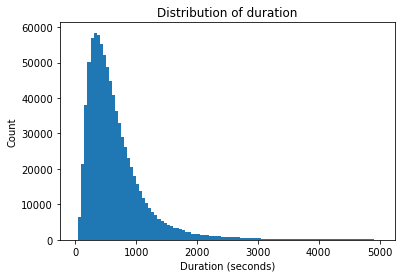

In [38]:
plt.hist(bike_data_copy['duration_sec'], bins=100, range=(0, 5000));
plt.title("Distribution of duration")
plt.ylabel("Count")
plt.xlabel('Duration (seconds)');

The hiring duration distribution exhibits a right skew, indicating that most rides have shorter durations. Specifically, a significant majority of rides fall within the range of less than 90 minutes (5000 seconds). This observation suggests that the majority of users tend to use the service for shorter trips rather than extended periods of time.

**Distribution of the months**

Let's create a function that will plot barcharts for us.

In [39]:
def plot_bar(column, rotation, xlabel, title):
    """takes pandas column, x ticks rotation, xlabel, title and returns a barchart of its values"""
    column.value_counts(sort=False).plot(kind='bar');
    plt.xticks(rotation=rotation)
    plt.title(title.title(), weight="bold")
    plt.xlabel(xlabel)
    plt.ylabel("Count");

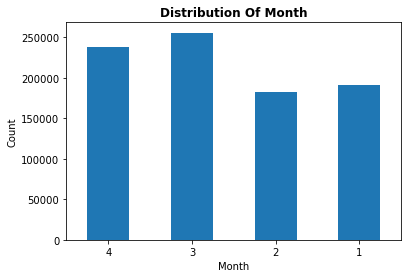

In [40]:
# ploting monthly distribution
plot_bar(bike_data_copy.month, rotation=0, xlabel="Month", title="Distribution of Month")

February and March showed contrasting levels of biking activity, with February having the lowest number of bike rides and March having the highest.

**Distributions of the days**

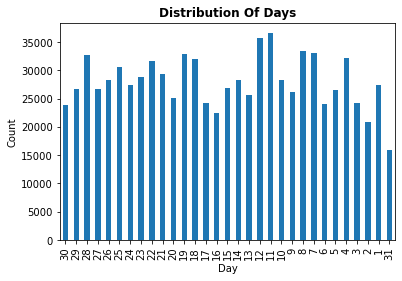

In [41]:
# plotting daily distribution
plot_bar(bike_data_copy.day, rotation=90, xlabel="Day", title="Distribution of days")

The eleventh and twelfth days experienced the highest levels of bike traffic, while the 31st day had the lowest. It's worth noting that the lower count on the 31st is due to the fact that only March has 31 days among the four months being analyzed. The daily ride patterns exhibit irregular fluctuations, indicating variations in biking activity throughout the month.

**Let's see the distribution of number of bikings per week**

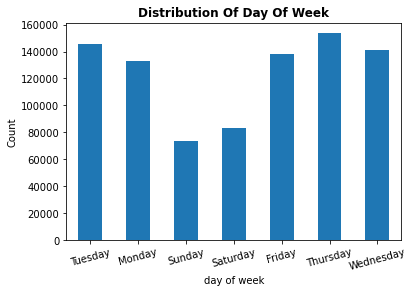

In [42]:
# plotting weekly distribution
plot_bar(bike_data_copy.day_of_week, 
    rotation=15, 
    xlabel="day of week", 
    title="Distribution of day of week")

Thursday emerges as the busiest day of the week, exhibiting the highest biking activity. As expected, the number of bike rides decreases over the weekends, indicating a decline in biking participation during Saturday and Sunday.

**Let's find the peak hours**

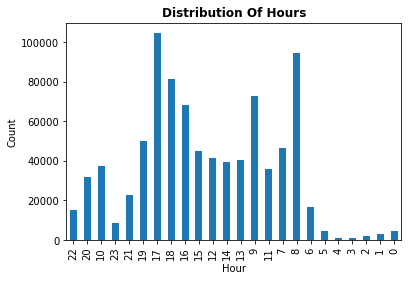

In [43]:
# plotting hourly distributions
plot_bar(bike_data_copy.hour, 
    rotation=90, 
    xlabel="Hour", 
    title="Distribution of hours")


The chart suggests that a significant portion of the bikers are likely 9-5 workers, as indicated by the busiest hours coinciding with typical working hours. Furthermore, as expected, the majority of the rides occurred during daytime hours, aligning with common commuting patterns and recreational activities.

**Let's see the distribution of the user groups**

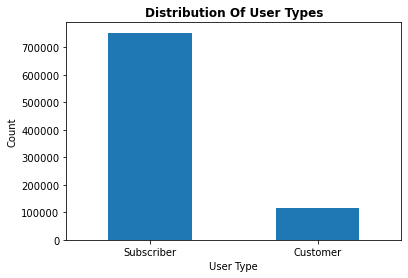

In [44]:
# user group distributions
plot_bar(bike_data_copy.user_type, 
    rotation=0, 
    xlabel="User Type", 
    title="Distribution of user types")

The chart clearly illustrates the widespread acceptance of bike sharing, with an overwhelming majority of users being subscribers rather than one-off users. This indicates a strong and loyal customer base, demonstrating the popularity and sustained usage of the bike sharing service among recurring subscribers.

**Let's see the distribution of bike_share_for_all_trip.**

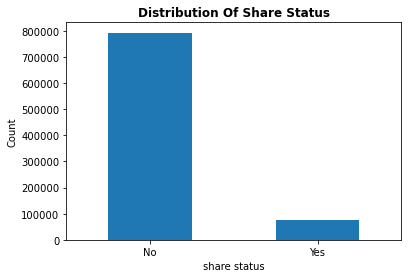

In [45]:
# plotting the column chart of bike share
plot_bar(bike_data_copy.bike_share_for_all_trip, 
    rotation=0, 
    xlabel="share status", 
    title="Distribution of share status")

The chart reveals that a significant majority of users do not check in on time.

**Let's see the age distributions of the riders**

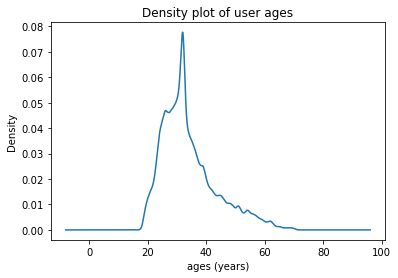

In [46]:
# plotting the density plot of the age distribution
bike_data_copy.ages.plot.density();
plt.xlabel("ages (years)")
plt.title("Density plot of user ages");

The age distribution appears to be right-skewed, indicating that a majority of riders are in their thirties or younger, with a higher concentration towards younger age groups.

**Let's see gender composition of the riders**

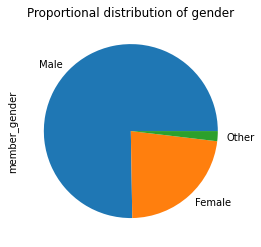

In [47]:
# checking the composition of the genders
bike_data_copy.member_gender.value_counts().plot.pie()
plt.title("Proportional distribution of gender");

The chart reveals that a significant majority of users are males.

### Bivariate Exploration

In this section, we will examine the relationships between pairs of variables to identify any potential correlations or associations. By analyzing two variables at a time, we aim to uncover patterns, dependencies, and interactions between different features of the dataset. This exploration will provide insights into how variables influence each other and contribute to a deeper understanding of the underlying relationships within the data.

**Let's plot the heatmap of the features of interest and the duration**

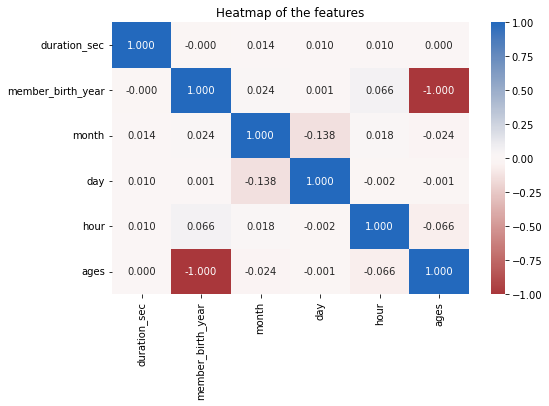

In [48]:
numeric_vars = ['duration_sec', "member_birth_year", 'month', 'day', 'hour', 'ages']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_data_copy[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Heatmap of the features");
plt.show()

There are very weak linear correlations between all features of interest and the target variable, duration.

**Let's visualize the piarwise correlation between duration and other variables of interest.**

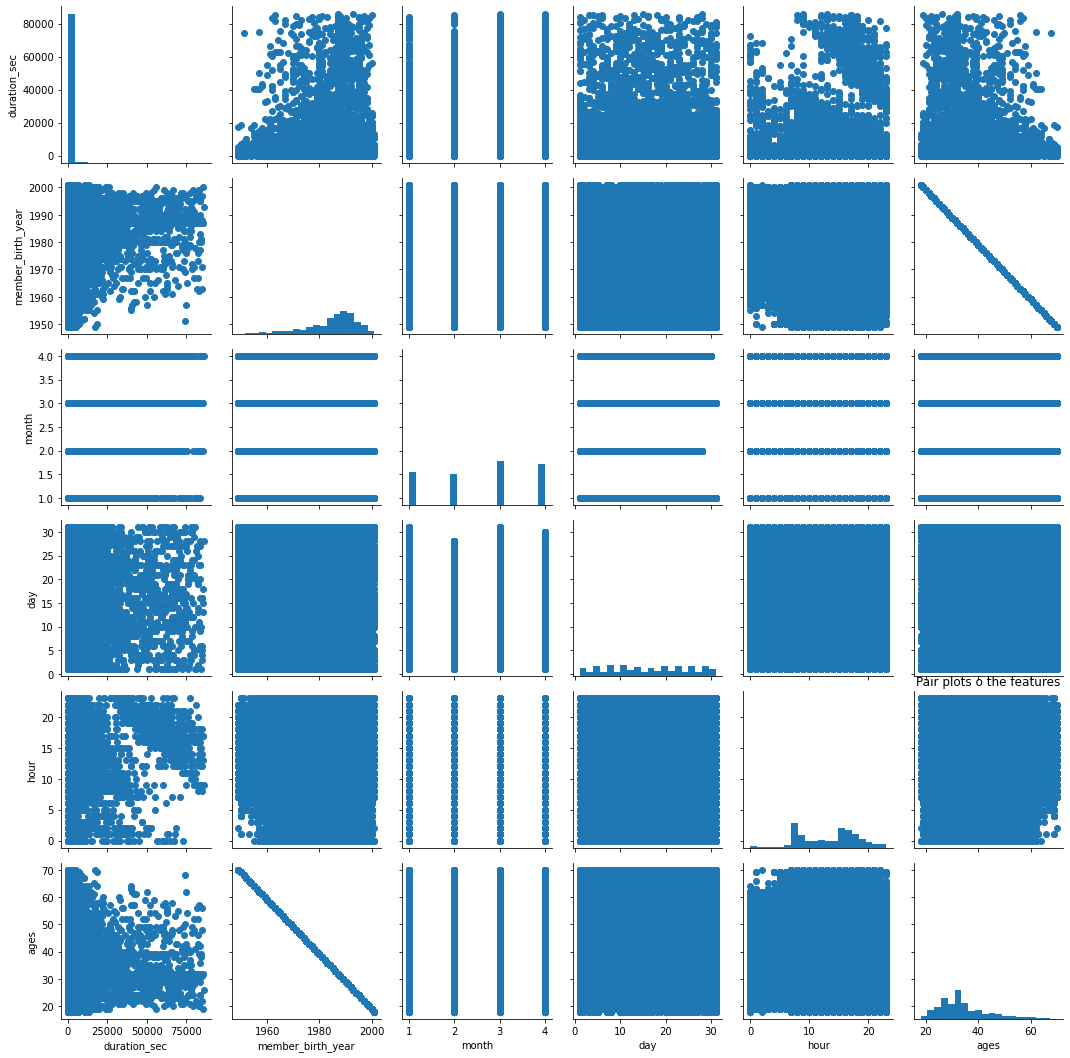

In [49]:
g = sb.PairGrid(data = bike_data_copy, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.title("Pair plots o the features");

The above piarwise plots confirm the heatmap correlation coefficients and we can see no obvious linear correlation between duration and other features of interest.

**Let's see the summary statistics of the ages**

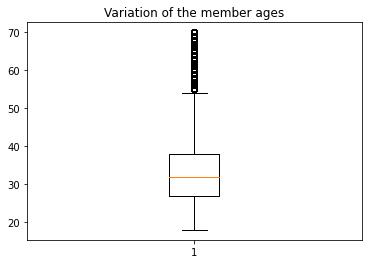

In [50]:
# plotting summary stats on box plot
plt.boxplot(bike_data_copy.ages);
plt.title("Variation of the member ages");

While the majority of bikers fall within the age range of late thirties and below, it is worth noting that a notable number of older individuals in their mid-fifties and above also engage in biking.

**Let's see the age distribution across gender violin plots of the genders**

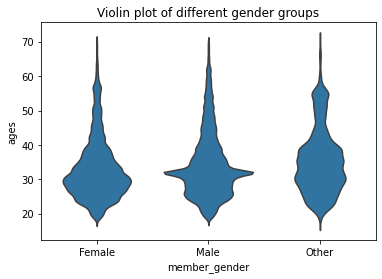

In [51]:
# plotting the violin plots of genders
base_color = sb.color_palette()[0] 
sb.violinplot(data=bike_data_copy, x='member_gender', y='ages', color=base_color, inner=None)
plt.xticks(rotation=0)
plt.title("Violin plot of different gender groups");

The violin plot shows that the majority of females are in their 30s, while males tend to be slightly older, typically above 30. In contrast, the age distribution of individuals belonging to the "other" gender category appears to be more uniformly distributed across different age groups.

## Multivariate Exploration
In this section, we will delve into the analysis of multiple variables simultaneously to explore complex relationships and interactions within the dataset. By considering the interplay between multiple factors, we aim to gain a deeper understanding of how various variables collectively influence the outcomes of interest. This comprehensive analysis will help uncover nuanced patterns, identify potential dependencies, and provide valuable insights into the underlying dynamics of the data.

**Let's find out whether the biking duration by hour depends on gender.**

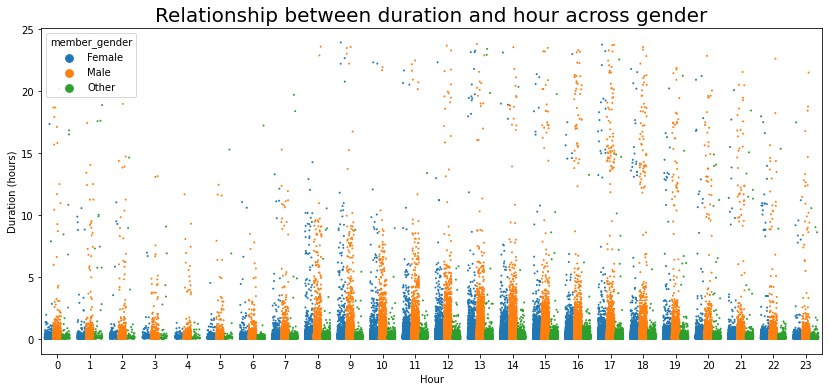

In [52]:
# set plot dimensions
plt.figure(figsize=[14, 6])
g = sb.stripplot(data = bike_data_copy, 
                 x='hour', 
                 y='duration_hr', 
                 hue = 'member_gender', 
                 size=2,
                jitter=0.35,
                dodge=True)

plt.title("Relationship between duration and hour across gender", fontsize=20);
plt.xlabel('Hour', fontsize=10);
plt.ylabel('Duration (hours)', fontsize=10);

Based on the plot, the following observations can be made:

1. The majority of rides occurred during daytime hours.
2. There is a relatively equal distribution of bike sharing across different genders throughout the day.
3. A significant number of riders who took trips between 3:00 PM and 2:00 AM had a duration close to one day before checking in.
4. Rides between 3:00 AM and 6:00 AM rarely exceed a duration of 15 hours.
5. For the "other" gender category, most rides lasted less than an hour.

**Let's see the whether their are clusters in the scatter plot of the duration and age for diffrent user types**

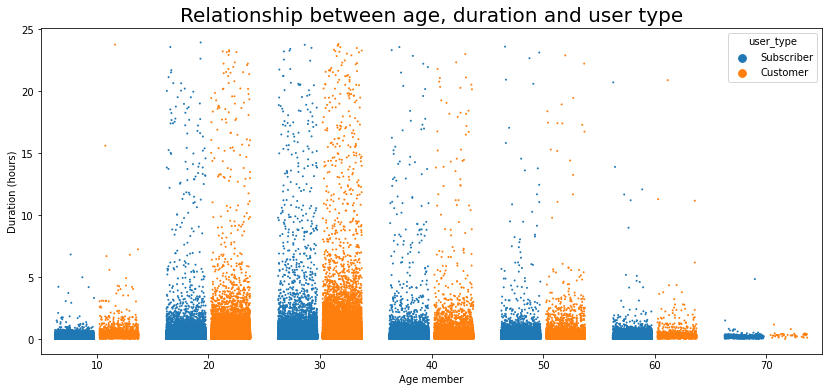

In [53]:
# create age intervals of 10 years
bike_data_copy['age_int'] = ((bike_data_copy['ages']//10)*10).astype(int)

f, g = plt.subplots(figsize=[14, 6])
g = sb.stripplot(data = bike_data_copy, 
                 x='age_int', 
                 y='duration_hr', 
                 hue = 'user_type', 
                 size=2,
                jitter=0.35,
                dodge=True)
plt.title("Relationship between age, duration and user type", fontsize=20);
plt.xlabel('Age member', fontsize=10);
plt.ylabel('Duration (hours)', fontsize=10);

Based on the plot, the following insights can be derived:
1. Individuals above 60 years of age and teenagers are less inclined to engage in longer bike rides.
2. The majority of longer duration rides are taken by individuals within the age range of 20-40.
3. The duration of bike rides does not appear to be significantly influenced by user type.

**Let's see how duration varies by customer type and gender**

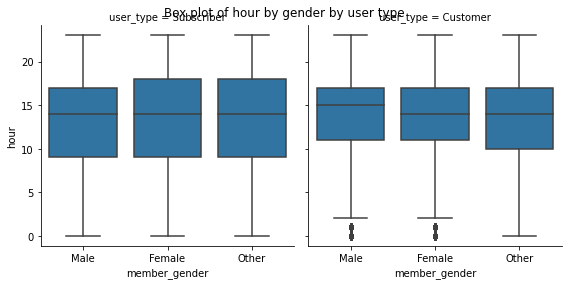

In [54]:
g = sb.FacetGrid(data = bike_data_copy, col = 'user_type', height = 4)
g.map(sb.boxplot, 'member_gender', 'hour')
g.fig.suptitle('Box plot of hour by gender by user type');


The box plots indicate that there is relatively little variation in the hours traveled across all genders within both the customer and subscriber categories.

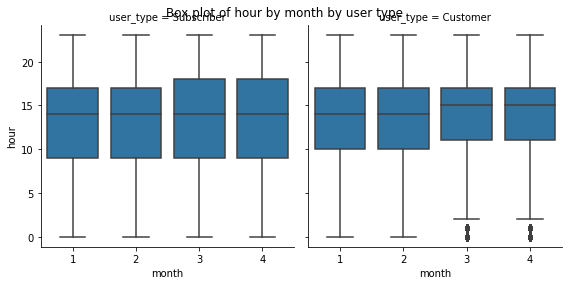

In [55]:
g = sb.FacetGrid(data = bike_data_copy, col = 'user_type', height = 4)
g.map(sb.boxplot, 'month', 'hour')
g.fig.suptitle('Box plot of hour by month by user type');

## Conclusions
Key findings from the analysis include:

1. Peak Hours: The busiest hours for biking are typically around 8 AM and 5 PM, indicating that a significant portion of riders are likely 9-5 workers.

2. Daytime Rides: The majority of rides occur during the daytime, suggesting that biking is more common during daylight hours.

3. Gender Distribution: Across different hours of the day, the proportion of different genders sharing bikes is relatively equal, indicating a balanced gender participation in bike rides.

4. Long Rides in the Evening: A considerable number of riders who took rides between 3:00 PM and 2:00 AM ended up spending close to a full day before returning the bike, indicating potential overnight rentals or extended usage.

5. Short Rides in Early Morning: Rides between 3:00 AM and 6:00 AM rarely exceed a duration of 15 hours, indicating shorter rides during these early morning hours.

6. Biking Duration by Gender: Most rides by individuals of the "other" gender tend to be shorter, lasting less than an hour, compared to rides by other genders.

7. Age and Duration: Riders above 60 years of age and teenagers are less likely to engage in longer bike rides, while individuals in the age range of 20-40 tend to have longer durations.

8. User Type and Duration: The analysis suggests that user type does not significantly impact biking duration, implying that both customers and subscribers have similar ride durations.

These findings provide valuable insights into the biking patterns and behaviour of riders, which can be used by the bike-sharing company to optimize their services, improve resource allocation during peak hours, and tailor marketing strategies to different demographics.